In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("tesla.csv")
df.head(5)

,Region,Manufacture date,Vehicle model,Daily Usage,Lifetime average,Date you charged to 100%,Your range at 100% [mi],100% range for this trim level [mi],Remaining battery capacity,Mileage [mi],Mileage [km]
0,Europe (excluding UK) & Asia Pacific,14-Apr-15,Model S 85,Medium,225.0,10-Jun-15,249,245,101.52%,2113.0,3400.0
1,UK,20-Jun-16,Model S 85,Medium,318.0,24-Dec-16,242,245,98.78%,16800.0,27037.0
2,Europe (excluding UK) & Asia Pacific,22-Aug-16,Model S 90D,Medium,210.0,18-Jan-18,268,278,96.42%,15845.0,25500.0
3,Canada,20-Jul-13,Model S P85,Mild,176.0,23-Aug-17,260,266,97.66%,37352.0,60113.0
4,Europe (excluding UK) & Asia Pacific,24-Jun-16,Model S 75,Mild,188.0,8-Oct-16,237,233,101.60%,821.0,1322.0


In [47]:
# Min, Max, Range
min_range_df = df["Your range at 100% [mi]"].min()
max_range_df = df["Your range at 100% [mi]"].max()

data_range_df = max_range_df - min_range_df
min_range_df, max_range_df, data_range_df

(158, 345, 187)

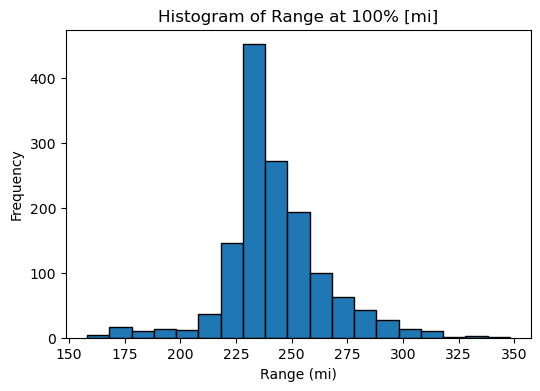

In [48]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df["Your range at 100% [mi]"], bins=range(int(min_range_df), int(max_range_df) + 10, 10), edgecolor='black')
plt.title('Histogram of Range at 100% [mi]')
plt.xlabel('Range (mi)')
plt.ylabel('Frequency')
plt.show()


The chart shows that most of the cars have a vehicle range around 230 [mi] and the
distribution appears to be unimodal, albeit not symmetric. There are very few
vehicles with range below 200 and above 300 miles.

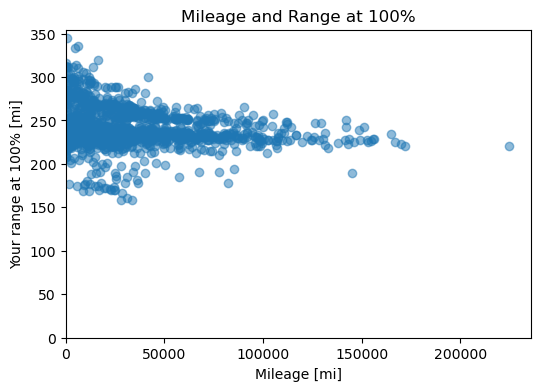

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Mileage [mi]"], df["Your range at 100% [mi]"], alpha=0.5)
plt.title('Mileage and Range at 100%')
plt.xlabel('Mileage [mi]')
plt.ylabel('Your range at 100% [mi]')
plt.xlim(left=0)  
plt.ylim(bottom=0) 
plt.show()


Overall, the vehicle range slightly decreases with the mileage on the electric vehicle.
It is expected since battery life deteriorates with usage in any battery powered
system.

In [50]:
mean_range = df["Your range at 100% [mi]"].mean()
median_range = df["Your range at 100% [mi]"].median()

mean_range, median_range

(241.757233592096, 238.0)

In [51]:
# Re-calculate the maximum range value from the "Your range at 100% [mi]" column to ensure accuracy
max_range_value_corrected = df["Your range at 100% [mi]"].max()

# Re-calculate the percentages using the correct maximum range value
std_dev_percentage_corrected = (std_dev / max_range_value_corrected) * 100
IQR_percentage_corrected = (IQR / max_range_value_corrected) * 100

std_dev_percentage_corrected, IQR_percentage_corrected


(6.500636767435008, 6.3768115942028984)

In [52]:
# sample standard deviation
std_dev_miles = df["Your range at 100% [mi]"].std(ddof=1)  
# interquartile range
iqr_miles = df["Your range at 100% [mi]"].quantile(0.75) - df["Your range at 100% [mi]"].quantile(0.25)
std_dev_miles, iqr_miles

(22.42719684765078, 22.0)

In [53]:
# 80th percentile
percentile_80_miles = df["Your range at 100% [mi]"].quantile(0.8)
percentile_80_miles

256.0

The results mean that 80% of the vehicles in the data set
have a range lower than 256 miles.

In [56]:
df.describe()

,Lifetime average,Your range at 100% [mi],100% range for this trim level [mi],Mileage [mi],Mileage [km]
count,1374.000000,1417.000000,1417.000000,1417.000000,1417.000000
mean,234.877739,241.757234,250.616796,34749.171299,55923.351266
std,43.497547,22.427197,21.826015,31028.912109,49936.198368
min,148.000000,158.000000,176.000000,6.000000,10.000000
25%,208.000000,231.000000,245.000000,11806.000000,19000.000000
50%,221.000000,238.000000,245.000000,27011.000000,43470.000000
75%,243.000000,253.000000,264.000000,48053.000000,77334.000000
max,450.000000,345.000000,338.000000,224626.000000,361500.000000


Text(0, 0.5, 'Frequency')

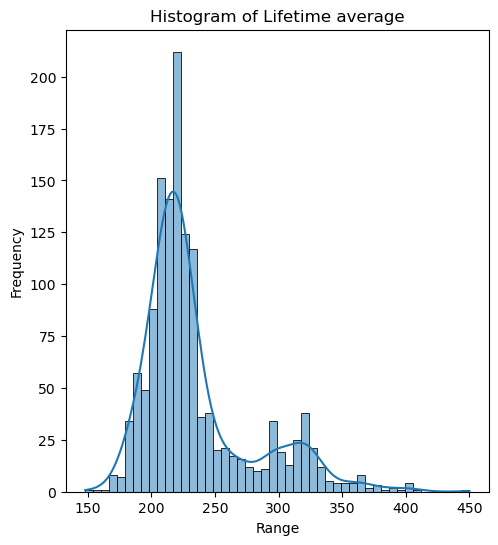

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Lifetime average"], kde=True)
plt.title('Histogram of Lifetime average')
plt.xlabel('Range')
plt.ylabel('Frequency')

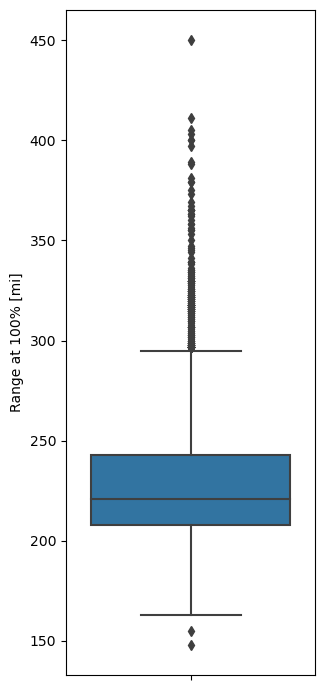

In [62]:
plt.figure(figsize=(6, 7))
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Lifetime average"])
plt.ylabel('Range at 100% [mi]')
plt.tight_layout()
plt.show()